In [12]:
# DONE:
# Downloaded both datasets from Desktop
# Removed unnessary columns from the json that showcases retweet and favorite count (interaction_json)
# Merged the interaction_json with questions_json on tweet_id column


# TO DO:
# WARNING - WE CAN MOVE OUR SCHEDULED PRESENTATION TIME TO OFFICE HOURS
    # We can honestly do the presentation itself next week if it sucks
# Take a look at the ReadMe file given with the dataset, it gives alot of important information we can use later.
# Try and find a way to get the raw data as from a url instead of pulling directly from Desktop
    #I tried my best but I couldn't figure it out
# Now that we are here, we can utilize the 'data' Dataframe to answer cool questions such as:
    # Do tweets with alot 
# Potentially use the normal Twitter API for more info/ask more questions
# Potentially use the module 9 notes to do some cool visualizations

In [13]:
import pandas as pd
import numpy as np
import networkx as nx
import json
import seaborn as sns
import matplotlib.pyplot as plt

# Download the data
json_data = pd.read_json('/Users/schned/Desktop/covid19_infodemic_english_data.json',lines=True)

json_data

# Removing uncessary columns
interaction_data = json_data.drop(columns=[
 'id_str',
 'full_text',
 'truncated',
 'display_text_range',
 'entities',
 'source',
 'in_reply_to_status_id',
 'in_reply_to_status_id_str',
 'in_reply_to_user_id',
 'in_reply_to_user_id_str',
 'in_reply_to_screen_name',
 'user',
 'geo',
 'coordinates',
 'place',
 'contributors',
 'is_quote_status',
 'lang',
 'quoted_status_id',
 'quoted_status_id_str',
 'quoted_status_permalink',
 'quoted_status',
 'possibly_sensitive',
 'extended_entities','favorited','retweeted'])

# Rename tweet id to use as merge index
interaction_data = interaction_data.rename(columns={'id': 'tweet_id'})

interaction_data


,created_at,tweet_id,retweet_count,favorite_count
0,2020-03-20 15:35:29+00:00,1241025578527903750,187425,954568
1,2020-03-19 02:36:13+00:00,1240467080954228737,333831,1505405
2,2020-03-19 19:08:52+00:00,1240716889162018816,160323,660762
3,2020-03-20 18:02:16+00:00,1241062514886090754,154086,368883
4,2020-03-21 19:30:08+00:00,1241447017945223169,126506,445713
...,...,...,...,...
486,2020-03-06 07:35:56+00:00,1235831463121059840,143,461
487,2020-03-06 16:35:12+00:00,1235967176475111432,168,278
488,2020-03-06 22:28:55+00:00,1236056191324864515,125,176
489,2020-03-06 17:54:16+00:00,1235987075440283648,179,539


In [14]:
# Download the other dataset containing the questions
question_data = pd.read_csv('/Users/schned/Desktop/covid19_infodemic_english_data.tsv', delimiter='\t')

# Merge the interaction data table with the question data table on shared 'tweet_id' index.
data = interaction_data.merge(question_data, how='inner', on='tweet_id')

data

,created_at,tweet_id,retweet_count,favorite_count,text,q1_label,q2_label,q3_label,q4_label,q5_label,q6_label,q7_label
0,2020-03-20 15:35:29+00:00,1241025578527903750,187425,954568,For the average American the best way to tell ...,no,NaN,NaN,NaN,NaN,no_joke_or_sarcasm,no_not_interesting
1,2020-03-19 02:36:13+00:00,1240467080954228737,333831,1505405,this is fucking bullshit,no,NaN,NaN,NaN,NaN,no_not_harmful,no_not_interesting
2,2020-03-19 19:08:52+00:00,1240716889162018816,160323,660762,Can y’all please just follow the government’s ...,no,NaN,NaN,NaN,NaN,no_not_harmful,no_not_interesting
3,2020-03-20 18:02:16+00:00,1241062514886090754,154086,368883,No offense but the corona virus disappearing b...,no,NaN,NaN,NaN,NaN,no_not_harmful,no_not_interesting
4,2020-03-21 19:30:08+00:00,1241447017945223169,126506,445713,This is the face of someone who just spent 9 h...,yes,2_no_probably_contains_no_false_info,4_yes_probably_of_interest,1_no_definitely_not_harmful,yes_not_urgent,no_not_harmful,no_not_interesting
...,...,...,...,...,...,...,...,...,...,...,...,...
486,2020-03-06 07:35:56+00:00,1235831463121059840,143,461,For example: When Trump invents numbers and ig...,no,NaN,NaN,NaN,NaN,no_not_harmful,no_not_interesting
487,2020-03-06 16:35:12+00:00,1235967176475111432,168,278,President Trump's comments about the coronavir...,yes,4_yes_probably_contains_false_info,4_yes_probably_of_interest,5_yes_definitely_harmful,yes_not_urgent,yes_rumor_conspiracy,no_not_interesting
488,2020-03-06 22:28:55+00:00,1236056191324864515,125,176,Drug companies reportedly killed a provision i...,yes,1_no_definitely_contains_no_false_info,4_yes_probably_of_interest,5_yes_definitely_harmful,yes_not_urgent,no_not_harmful,yes_blame_authorities
489,2020-03-06 17:54:16+00:00,1235987075440283648,179,539,Does @twitter have a team fighting covid-19 ru...,no,NaN,NaN,NaN,NaN,no_not_harmful,no_not_interesting


In [15]:
# ** Question/Task 1: Does the tweet contain a verifiable factual claim?

# Compare the average retweet/favorites between those flagged verifiably fake or true

retweet_average = data.groupby('q1_label', as_index=False)['retweet_count'].mean()
favorite_average = data.groupby('q1_label', as_index=False)['favorite_count'].mean()   

retweet_average
favorite_average


,q1_label,favorite_count
0,no,95456.151042
1,yes,55647.391304


<AxesSubplot:xlabel='retweet_count', ylabel='q2_label'>

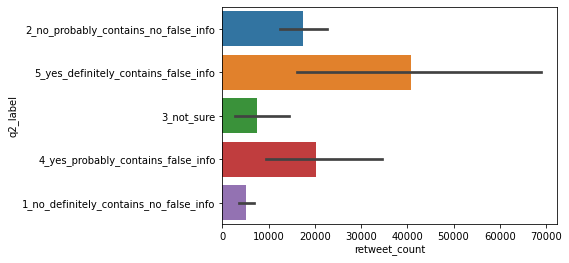

In [16]:
# ** Question/Task 2: To what extent does the tweet appear to contain false information?

sns.barplot(x='retweet_count', y='q2_label', data=data, orient='h')


<AxesSubplot:xlabel='favorite_count', ylabel='q2_label'>

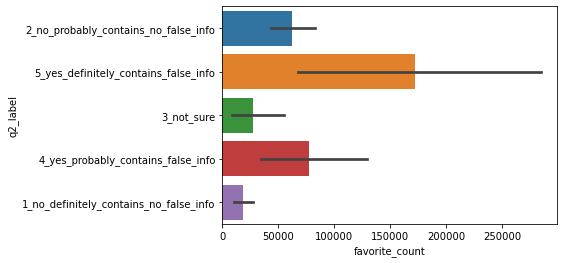

In [17]:
sns.barplot(x='favorite_count', y='q2_label', data=data, orient='h')

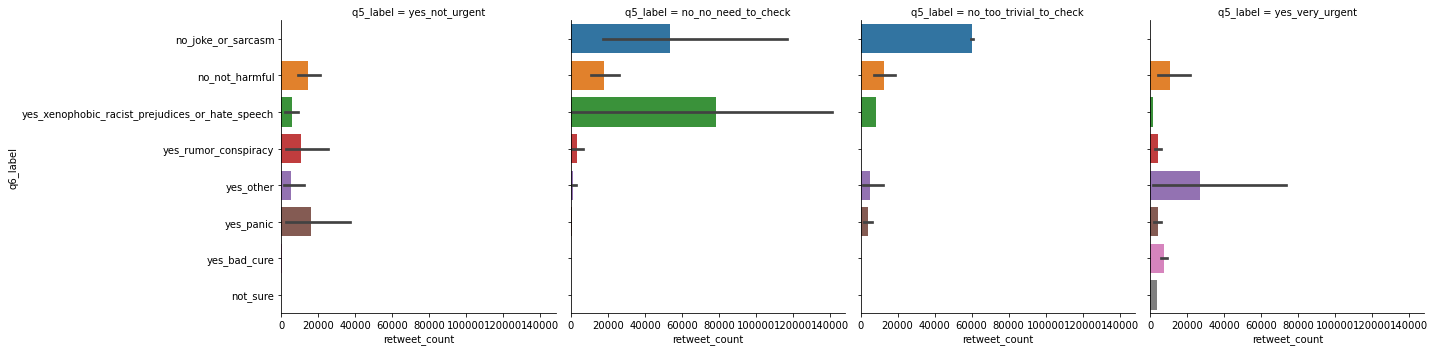

In [22]:
# ** Question/Task 3: Will the tweet's claim have an effect on or be of interest to the general public?

# sns.barplot(x='favorite_count', y='q2_label', data=data, orient='h')

sns.catplot(
    x='retweet_count', 
    y='q6_label', 
    col='q5_label', 
    kind='bar', 
    data=data,
    orient='h'
)





# data.sort_values(by=['col1'])
# ** Question/Task 4: To what extent does the tweet appear to be harmful to the society, person(s), company(s) or product(s)?


# ** Question/Task 5: Do you think that a professional fact-checker should verify the claim in the tweet?


# ** Question/Task 6: Is the tweet harmful to the society and why?


# ** Question/Task 7: Do you think that this tweet should get the attention of a government entity?
